In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os
import sys
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
dataset = load_iris()

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
dataset['data'].shape

(150, 4)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=42)

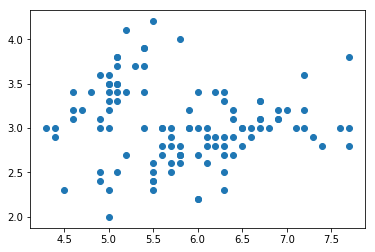

In [14]:
plt.scatter(X_train[:,0], X_train[:, 1])
plt.show()

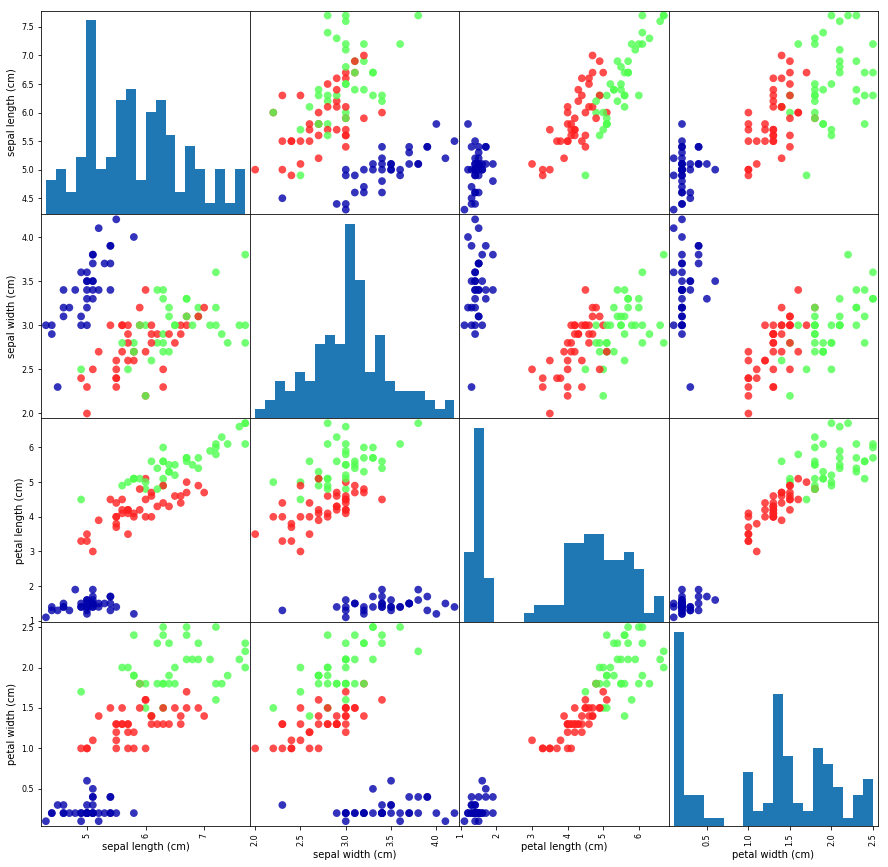

In [18]:
dataframe = pd.DataFrame(X_train, columns=dataset.feature_names)
grr = pd.plotting.scatter_matrix(dataframe, c=y_train, figsize=(15,15), marker='o', 
                       hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
knn.score(X_test, y_test)

1.0

In [26]:
X_new = np.array([[5,2.9, 1, 0.2]])
pred = knn.predict(X_new)
print(dataset['target_names'][pred])

['setosa']


In [36]:
X, y = mglearn.datasets.make_blobs()
X.shape

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


(100, 2)

Text(0, 0.5, 'Second feature')

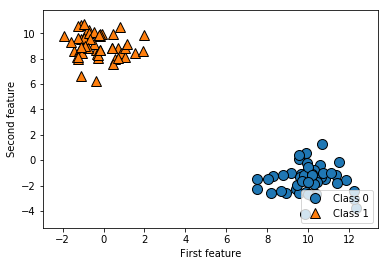

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4 )
plt.xlabel('First feature')
plt.ylabel('Second feature')

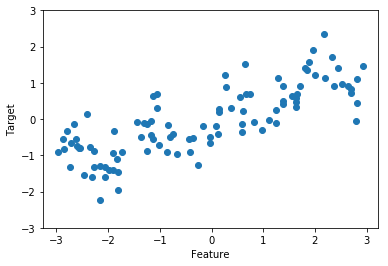

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


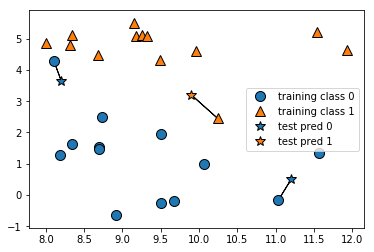

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


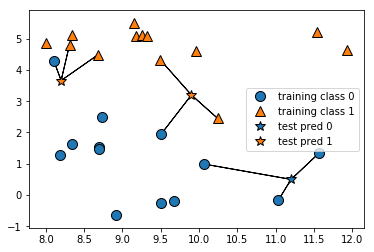

In [46]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [47]:
X, y = mglearn.datasets.make_forge()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'Second feature')

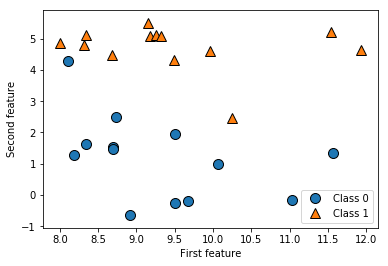

In [48]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4 )
plt.xlabel('First feature')
plt.ylabel('Second feature')

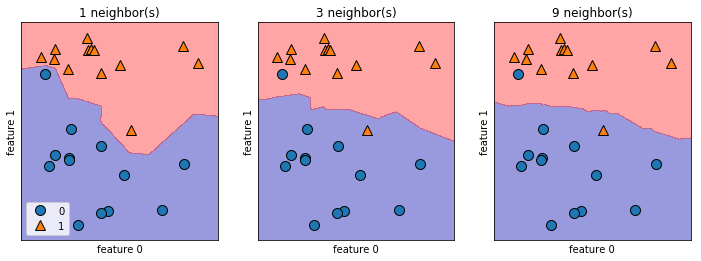

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

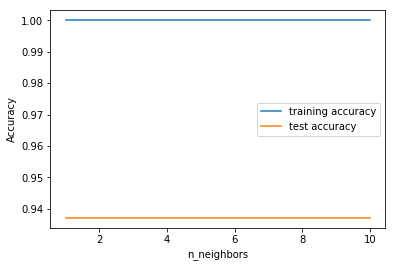

In [73]:
training_accuracy= []
test_accuracy = []
neighbors_settings = range(1, 11)

for neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

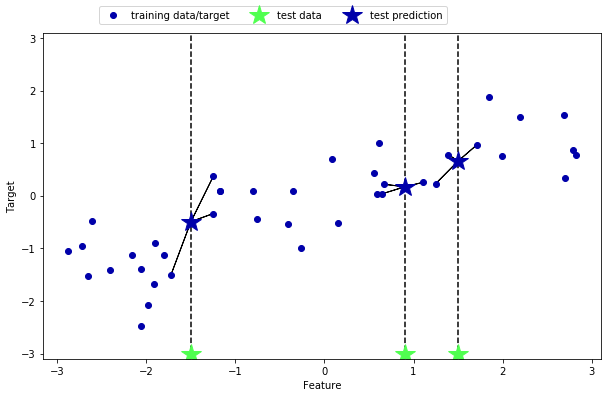

In [64]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)


0.2437997515208531

(10, 1)
(1000, 1)


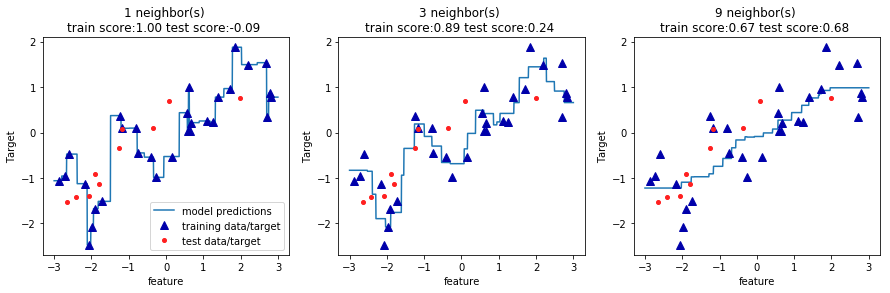

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
print(X_test.shape)
print(line.shape)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(line)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, '.', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} neighbor(s) \ntrain score:{:.2f} test score:{:.2f} '.format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('Target')
axes[0].legend(['model predictions', "training data/target", 'test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


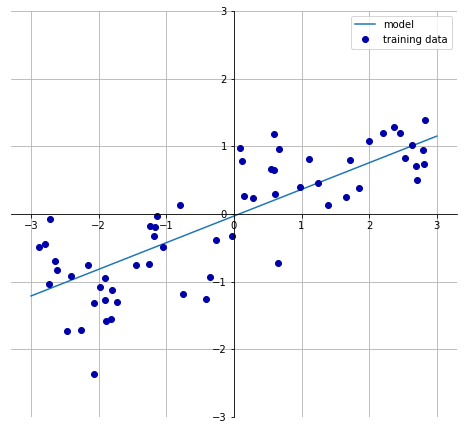

In [102]:
mglearn.plots.plot_linear_regression_wave()

In [111]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [112]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
np.sum(lasso.coef_ != 0)

3

In [115]:
from sklearn.linear_model import Ridge
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)
ridge10.score(X_test, y_test)

0.7279392273706593

In [116]:
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)
ridge01.score(X_test, y_test)

0.8246491875314652

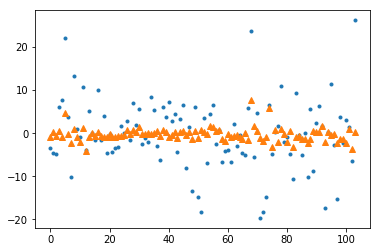

In [117]:
plt.plot(ridge01.coef_, '.', label='alpha=0.1')
plt.plot(ridge10.coef_, '^', label='alpha=10')

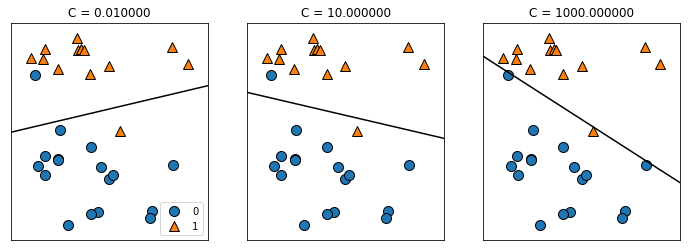

In [123]:
mglearn.plots.plot_linear_svc_regularization()

In [126]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target,random_state=42)

In [130]:
log_reg = LogisticRegression(C=100)
log_reg.fit(X_train, y_train)
print('Train score: {} \nTest score: {}'.format( log_reg.score(X_train, y_train), log_reg.score(X_test, y_test) ))

Train score: 0.971830985915493 
Test score: 0.965034965034965


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
log_reg = LogisticRegression(C=0.01)
log_reg.fit(X_train, y_train)
print('Train score: {} \nTest score: {}'.format( log_reg.score(X_train, y_train), log_reg.score(X_test, y_test) ))

Train score: 0.9342723004694836 
Test score: 0.9300699300699301


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)

In [136]:
from sklearn.svm import LinearSVC
svm = LinearSVC().fit(X, y)

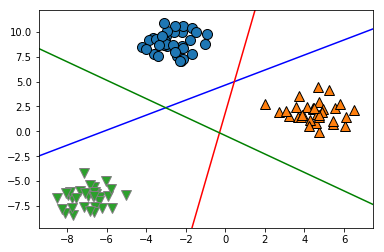

In [139]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-10, 10)
for coef, intercept, color in zip(svm.coef_, svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)


plt.show()

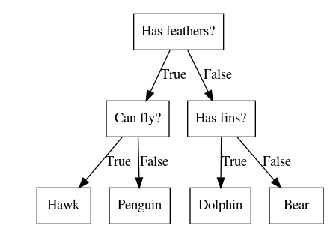

In [142]:
mglearn.plots.plot_animal_tree()

In [141]:
!pip install graphviz

In [143]:
def print_score(model):
    print('Train score: {} \nTest score: {}'.format( model.score(X_train, y_train), model.score(X_test, y_test) ))

In [144]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print_score(tree)

Train score: 1.0 
Test score: 0.9300699300699301


In [145]:
tree.feature_importances_

array([0.        , 0.0393304 , 0.        , 0.        , 0.00891967,
       0.        , 0.00668975, 0.        , 0.        , 0.        ,
       0.00243087, 0.        , 0.        , 0.01979647, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00401385,
       0.        , 0.03459892, 0.72534081, 0.03687207, 0.01684384,
       0.        , 0.        , 0.10516335, 0.        , 0.        ])

In [146]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [165]:
importances = np.argsort(tree.feature_importances_)
importances = importances[::-1]
for item in importances:
    print('{} : \t {}'.format( cancer.feature_names[item]  ,tree.feature_importances_[item]))

worst perimeter : 	 0.7253408135235746
worst concave points : 	 0.10516335251583357
mean texture : 	 0.039330395432853375
worst area : 	 0.036872067668062135
worst texture : 	 0.03459892281288575
area error : 	 0.019796472175669606
worst smoothness : 	 0.01684383738655522
mean smoothness : 	 0.008919668025031604
mean concavity : 	 0.006689751018773702
fractal dimension error : 	 0.004013850611264224
radius error : 	 0.0024308688294962574
worst fractal dimension : 	 0.0
mean concave points : 	 0.0
mean symmetry : 	 0.0
mean area : 	 0.0
mean compactness : 	 0.0
mean perimeter : 	 0.0
mean fractal dimension : 	 0.0
smoothness error : 	 0.0
texture error : 	 0.0
perimeter error : 	 0.0
worst symmetry : 	 0.0
compactness error : 	 0.0
concavity error : 	 0.0
concave points error : 	 0.0
symmetry error : 	 0.0
worst radius : 	 0.0
worst compactness : 	 0.0
worst concavity : 	 0.0
mean radius : 	 0.0


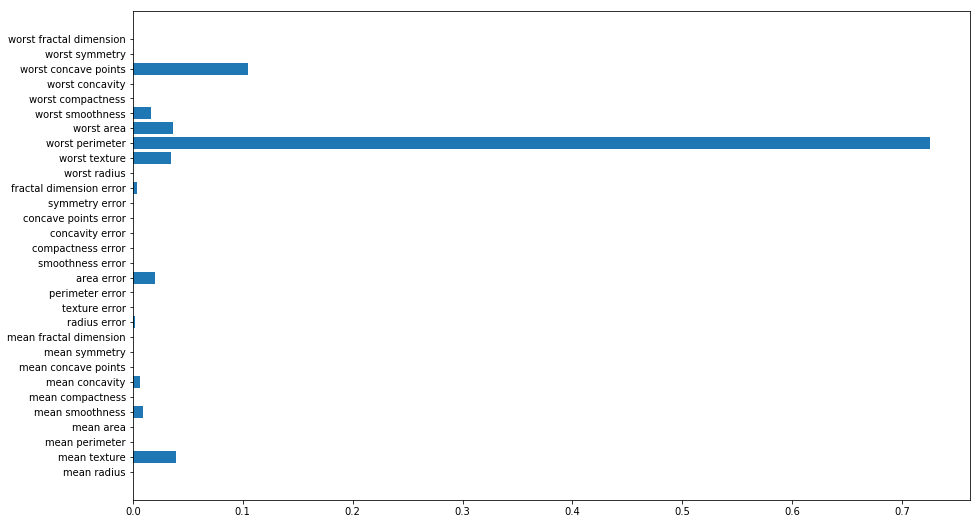

In [167]:
def plot_feature_importances(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(15, 9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
plot_feature_importances(tree)

Feature importances: [0. 1.]


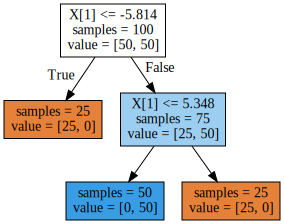

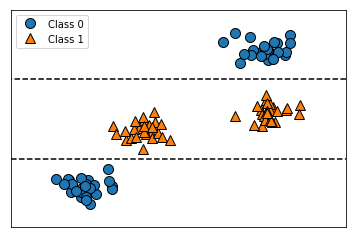

In [168]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)